In [ ]:
using Pkg
Pkg.activate("..")

using SoilDifferentialEquations
using Plots
# pyplot(framestyle=:box)
gr(framestyle=:box)

  Activating project at `D:\GitHub\CUG-hydro\SoilDifferentialEquations.jl`


Plots.GRBackend()

In [ ]:
par = get_soilpar(4, method_retention="van_Genuchten")

VanGenuchten{Float64}
  θ_sat: Float64 0.41
  θ_res: Float64 0.095
  Ksat: Float64 0.26
  α: Float64 0.019
  n: Float64 1.31
  m: Float64 0.23664122137404586


par = VanGenuchten{Float64}
  θ_sat: Float64 0.43
  θ_res: Float64 0.089
  Ksat: Float64 0.07
  α: Float64 0.01
  n: Float64 1.23
  m: Float64 0.1869918699186992

(θ_fc, θ_wp) = (0.33826835986334947, 0.19666698752473746)


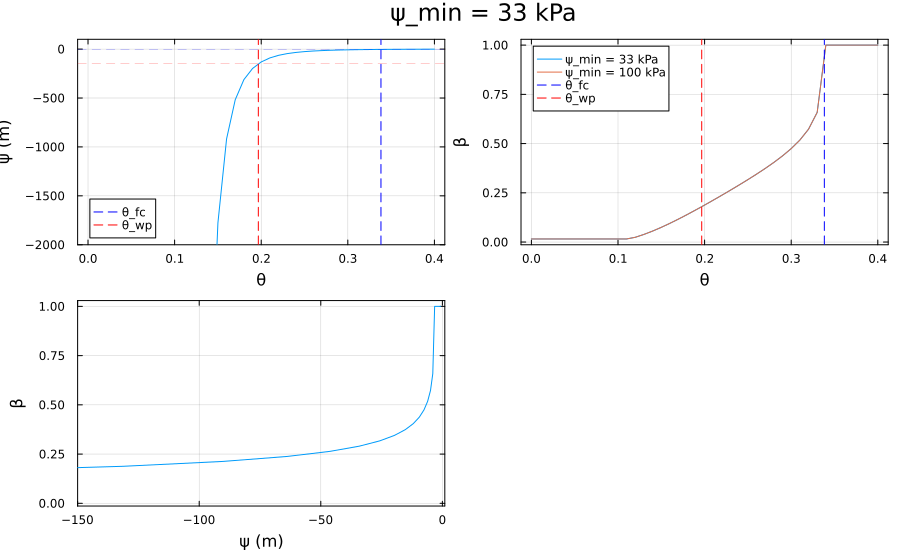

In [ ]:
par = get_soilpar(5, method_retention="van_Genuchten")
@show par
θ = 0.0:0.01:0.4

θ_fc = Retention_θ.(-3.3 * 100; par) # 33kPa = 3.3m
θ_wp = Retention_θ.(-150.0 * 100; par) # 1500kPa = 150.0m

@show θ_fc, θ_wp

ψ = Retention_ψ.(θ; par) ./ 100 # [cm] to [m]
β = cal_βw_BEPS.(ψ; ψ_min=33. / 10)
β2 = cal_βw_BEPS.(ψ; ψ_min=100. / 10)

p1 = plot(θ, ψ; ylabel="ψ (m)", xlabel="θ", label="", ylim=[-20000, 1000] ./ 10)
vline!(p1, [θ_fc], label="θ_fc", linestyle=:dash, color=:blue)
vline!(p1, [θ_wp], label="θ_wp", linestyle=:dash, color=:red)
hline!(p1, [-3.3], label="", linestyle=:dash, color=:blue, linewidth=0.2)
hline!(p1, [-150], label="", linestyle=:dash, color=:red, linewidth=0.2)

p2 = plot(θ, β; ylabel="β", xlabel="θ", label="ψ_min = 33 kPa", legendposition=:topleft)
plot!(p2, θ, β; label="ψ_min = 100 kPa")
vline!(p2, [θ_fc], label="θ_fc", linestyle=:dash, color=:blue)
vline!(p2, [θ_wp], label="θ_wp", linestyle=:dash, color=:red)

p3 = plot(ψ, β; xlabel="ψ (m)", ylabel="β", label="", xlim=[-1500, 10] ./ 10)

plot(p1, p2, p3; size=(900, 550), plot_title="ψ_min = 33 kPa")
## BEPS水分限制阈值，可能偏低
# 33-1500 kPa

In [ ]:
_ψ = [-1500, -100, -33, -10] ./ 10 # [m]
β = cal_βw_BEPS.(_ψ; ψ_min=33. / 10)

4-element Vector{Float64}:
 0.17978764280805196
 0.4296512891016162
 1.0
 1.0

In [ ]:
β = cal_βw_BEPS.(_ψ; ψ_min=100. / 10)

4-element Vector{Float64}:
 0.2581468062674316
 1.0
 1.0
 1.0